# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import pandas as pd 
import numpy as np
import re

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
# your answer here
data = pd.read_csv('Temp_States.csv')
temp = pd.DataFrame(data)

#### Print `temp`

In [3]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [4]:
# your answer here
temp.dtypes
# what we expected

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [5]:
# your answer here
temp.loc[temp['State'] == 'New York']

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [6]:
# your answer here
temp.loc[temp['State'] == 'New York'].mean()

Temperature    10.740741
dtype: float64

#### We want to know cities and states with Temperature above 15 degress Celcius

In [7]:
# your answer here
temp.loc[temp['Temperature'] > 15]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [8]:
# your answer here
temp.loc[temp['Temperature'] > 15]['City']

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [9]:
# your answer here
temp1 = temp.loc[temp['Temperature'] > 15]
temp2 = temp1.loc[temp1['Temperature'] < 20]
temp2

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [10]:
# your answer here
mean_temp = temp['Temperature'].mean()
std_temp = temp['Temperature'].std()
# df1['e'] = Series(np.random.randn(sLength), index=df1.index)

temp['mean_temp'] = mean_temp
temp['std_temp'] = std_temp

temp

,City,State,Temperature,mean_temp,std_temp
0,NYC,New York,19.444444,15.15873,6.695265
1,Albany,New York,9.444444,15.15873,6.695265
2,Buffalo,New York,3.333333,15.15873,6.695265
3,Hartford,Connecticut,17.222222,15.15873,6.695265
4,Bridgeport,Connecticut,14.444444,15.15873,6.695265
5,Treton,New Jersey,22.222222,15.15873,6.695265
6,Newark,New Jersey,20.000000,15.15873,6.695265


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [11]:
# your answer here
data = pd.read_csv('Employee.csv')
employee = pd.DataFrame(data)

#### Explore the data types of the Temp dataframe. Comment your results

In [12]:
# your answer here
employee.dtypes
# salary is rounded should be a float data type, Gender could be a boolean

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

In [13]:
# your answer here
employee.hist(bins = 20)
# The histograms seem to have data with high variation, there does not seem to be a correlation between salary and years

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111547ac8>,
      dtype=object)

#### What's the average salary in this company?

In [14]:
# your answer here
mean_salary = employee['Salary'].mean()

#### What's the highest salary?

In [15]:
# your answer here
employee['Salary'].max()

70

#### What's the lowest salary?

In [16]:
# your answer here
employee['Salary'].min()

30

#### Who are the employees with the lowest salary?

In [17]:
# your answer here
 
employee.loc[employee['Salary'] == 30]


,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [18]:
# your answer here
employee.loc[employee['Name'] == 'David']


,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [19]:
# your answer here
employee.loc[employee['Name'] == 'David']['Salary']

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [20]:
# your answer here
employee.loc[employee['Title'] == 'associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [21]:
# your answer here- 1 method
employee[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [22]:
# your answer here- 2nd method
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [23]:
# your answer here
associates = employee.loc[employee['Title'] == 'associate']
rich_associates = associates.loc[associates['Salary'] > 55]
rich_associates

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [24]:
# your answer here
sort_years = employee.sort_values(by=['Years'])
sort_years

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
5,Eva,Sales,Bachelor,F,associate,2,55
4,Samuel,Sales,Master,M,associate,3,55
3,Sonia,HR,Bachelor,F,analyst,4,35
7,Pedro,IT,Phd,M,associate,7,60
6,Carlos,IT,Master,M,VP,8,70
8,Ana,HR,Master,F,VP,8,70


####  What is the average Salary per title?

In [39]:
# your answer here
 
employee.groupby(by=['Title'], as_index = False).agg('Salary')
employee
'''
'''

'\n'

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

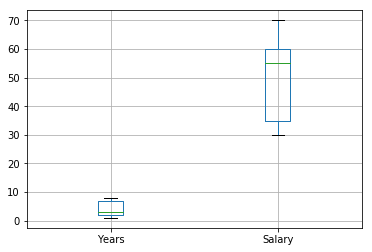

In [26]:
# draw boxplot here
import matplotlib
%matplotlib inline

employee.boxplot()


In [27]:
# print first quartile here
'''
'''

'\n'

In [28]:
# print third quartile here
'''
'''

'\n'

#### Is the mean salary per gender different?

In [29]:
# your answer here
'''
sort_gender = temp.sort_values(by=['Gender'])
sort_gender.groupby(by=['Gender'])
sort_gender
'''

"\nsort_gender = temp.sort_values(by=['Gender'])\nsort_gender.groupby(by=['Gender'])\nsort_gender\n"

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [30]:
# your answer here

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [31]:
# your answer here

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [46]:
# your answer here
data = pd.read_csv(z.open('Orders.csv'))
orders = pd.DataFrame(data)

AttributeError: type object 'zip' has no attribute 'open'

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [ ]:
# your answer here

In [ ]:
# your answer here

####  What is the average Purchase Price?

In [ ]:
# your answer here

#### What were the highest and lowest purchase prices? 

In [ ]:
# your answer here

In [ ]:
# your answer here

#### Select all the customers we have in Spain

In [ ]:
# your answer here

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [ ]:
# your answer here

#### Select all the customers who have bought more than 50 items ?

In [ ]:
# your answer here

#### Select orders from Spain that are above 50 items

In [ ]:
# your answer here

#### Select all free orders

In [ ]:
# your answer here

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [ ]:
# your answer here

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [ ]:
# your answer here

#### Show the frequency distribution of the amount spent in Spain.

In [ ]:
# your answer here

#### Select all orders made in the month of August

In [ ]:
# your answer here

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [ ]:
# your answer here

#### What's the  average amount of money spent by country

In [ ]:
# your answer here

#### What's the most expensive item?

In [ ]:
# your answer here

#### What was the average amount spent per year ?

In [ ]:
# your answer here